In [154]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


**Imports**

In [155]:
import numpy as np
import pandas as pd

In [156]:
test=pd.read_csv("/kaggle/input/playground-series-s4e11/test.csv")
train=pd.read_csv("/kaggle/input/playground-series-s4e11/train.csv")
sample=pd.read_csv("/kaggle/input/playground-series-s4e11/sample_submission.csv")

In [157]:
train

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,140695,Vidya,Female,18.0,Ahmedabad,Working Professional,NaN,NaN,5.0,NaN,NaN,4.0,5-6 hours,Unhealthy,Class 12,No,2.0,4.0,Yes,1
140696,140696,Lata,Female,41.0,Hyderabad,Working Professional,Content Writer,NaN,5.0,NaN,NaN,4.0,7-8 hours,Moderate,B.Tech,Yes,6.0,5.0,Yes,0
140697,140697,Aanchal,Female,24.0,Kolkata,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,1.0,More than 8 hours,Moderate,B.Com,No,4.0,4.0,No,0
140698,140698,Prachi,Female,49.0,Srinagar,Working Professional,Plumber,NaN,5.0,NaN,NaN,2.0,5-6 hours,Moderate,ME,Yes,10.0,1.0,No,0


In [158]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [159]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

Data Cleaning

1-Removing the null values

In [160]:
null_prof = test.loc[test["Profession"].isna(), "Working Professional or Student"].drop_duplicates().tolist()


In [161]:
null_prof

['Student', 'Working Professional']

We are going to create a new column Occupation that contains the Occupation of the person 

In [162]:
#if the person is a student
train.loc[train["Working Professional or Student"]=="Student","Occupation"]="Student"

In [163]:
#if the person is a working professional and we know his profession
train.loc[(train["Profession"].isna()==False),"Occupation"]=train["Profession"]

In [164]:
#if the person is a working professional and we dont know his profession
train.loc[train["Occupation"].isna(),"Occupation"]=train["Working Professional or Student"]

we re going to apply the same treatment on the test dataset

In [165]:
test.loc[test["Working Professional or Student"]=="Student","Occupation"]="Student"

In [166]:
test.loc[(test["Profession"].isna()==False),"Occupation"]=test["Profession"]

In [167]:
test.loc[test["Occupation"].isna(),"Occupation"]=test["Working Professional or Student"]

We re going to merge the study satisfaction and the Job Satisfaction columns to create a new column called Satisfaction (or Occupation Satisfaction to be more precise)

In [168]:
train["Satisfaction"]=train["Study Satisfaction"]

In [169]:
train.loc[train["Satisfaction"].isna(),"Satisfaction"]=train["Job Satisfaction"]

In [170]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 22 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [171]:
test["Satisfaction"]=test["Study Satisfaction"]
test.loc[test["Satisfaction"].isna(),"Satisfaction"]=test["Job Satisfaction"]

In [172]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

we re going to fill the null values of the column with the mean value of this column


In [173]:

train["Satisfaction"] =train["Satisfaction"].fillna(train["Satisfaction"].mean())

In [174]:
test["Satisfaction"] =test["Satisfaction"].fillna(test["Satisfaction"].mean())


In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 22 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

We re going to merge the Academic Pressure and the Work Pressure columns to create a new column called Pressure (or Occupation Pressure to be more precise)

In [176]:
train["Pressure"]=train["Academic Pressure"]

In [177]:
train.loc[train["Pressure"].isna(),"Pressure"]=train["Work Pressure"]

In [178]:
train["Pressure"]=train["Pressure"].fillna(train["Pressure"].mean())

In [179]:
test["Pressure"]=test["Academic Pressure"]

In [180]:
test.loc[test["Pressure"].isna(),"Pressure"]=test["Work Pressure"]

In [181]:
test["Pressure"]=test["Pressure"].fillna(test["Pressure"].mean())

4-Dietary Habits

In [182]:
train["Dietary Habits"].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Yes', 'Pratham', 'BSc',
       'Gender', '3', 'More Healthy', 'Less than Healthy', 'Mihir', '1.0',
       'Hormonal', 'Electrician', nan, 'No Healthy', 'Less Healthy',
       'M.Tech', 'Vegas', 'No', 'Male', 'Indoor', 'Class 12', '2'],
      dtype=object)

In [183]:
test["Dietary Habits"].unique()

array(['Moderate', 'Healthy', 'Unhealthy', 'More Healthy', 'No', 'Indoor',
       'Prachi', nan, 'Male', 'Less Healthy', 'Mealy', 'Resistant', 'MCA',
       '5 Healthy', 'Academic', 'Educational', 'Soham', '5 Unhealthy',
       'Vivaan', 'Raghav', '1.0', 'Naina', 'Kolkata'], dtype=object)

In [184]:
healthy = ["Healthy", "5 Healthy", "More Healthy"]
unhealthy = ["Unhealthy", "5 Unhealthy", "Less Healthy","Mealy"]

In [185]:
train.loc[train["Dietary Habits"].isin(healthy), "Dietary Habits"] = "Healthy"
train.loc[train["Dietary Habits"].isin(unhealthy), "Dietary Habits"] = "Unhealthy"


In [186]:
test.loc[test["Dietary Habits"].isin(healthy), "Dietary Habits"] = "Healthy"
test.loc[test["Dietary Habits"].isin(unhealthy), "Dietary Habits"] = "Unhealthy"


In [187]:
train.loc[train["Dietary Habits"].isin(["Healthy","Unhealthy","Moderate"])==False, "Dietary Habits"] = "Unknown"

In [188]:
test.loc[test["Dietary Habits"].isin(["Healthy","Unhealthy","Moderate"])==False, "Dietary Habits"] = "Unknown"

In [189]:
train["Dietary Habits"].unique()

array(['Healthy', 'Unhealthy', 'Moderate', 'Unknown'], dtype=object)

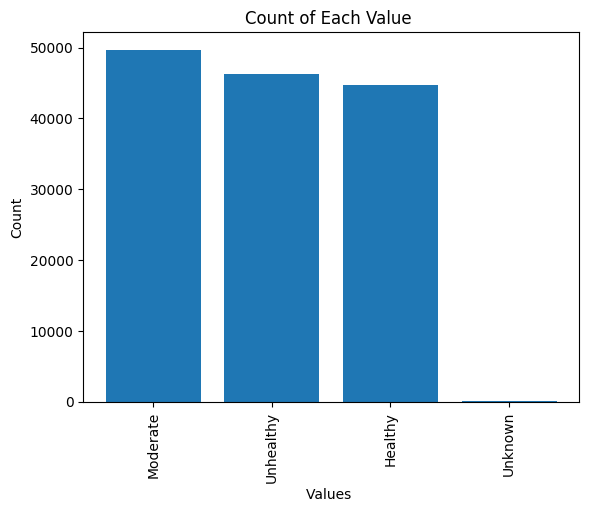

In [190]:
import matplotlib.pyplot as plt

# Count the occurrences of each value in the 'de' column
value_counts = train["Dietary Habits"].value_counts()

# Create a bar plot
plt.bar(value_counts.index, value_counts.values)

# Customize the plot (optional)
plt.title('Count of Each Value ')
plt.xlabel('Values ')
plt.ylabel('Count')

# Display the plot
plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
plt.show()


In [191]:
train["Dietary Habits"].value_counts()

Dietary Habits
Moderate     49705
Unhealthy    46228
Healthy      44743
Unknown         24
Name: count, dtype: int64

In [192]:
# Find the indices of rows where the value is 'X'
x_indices = train[train["Dietary Habits"] == "Unknown"].index

# Update the first 8 rows to "Healthy"
train.loc[x_indices[:8], "Dietary Habits"] = "Healthy"

# Update the next 8 rows to "Unhealthy"
train.loc[x_indices[8:16], "Dietary Habits"] = "Unhealthy"

# Update the remaining rows to "Moderate"
train.loc[x_indices[16:], "Dietary Habits"] = "Moderate"


In [193]:
# Find the indices of rows where the value is 'Unknown'
x_indices = test[test["Dietary Habits"] == "Unknown"].index

# Update the first 8 rows to "Healthy"
test.loc[x_indices[:8], "Dietary Habits"] = "Healthy"

# Update the next 8 rows to "Unhealthy"
test.loc[x_indices[8:16], "Dietary Habits"] = "Unhealthy"

# Update the remaining rows to "Moderate"
test.loc[x_indices[16:], "Dietary Habits"] = "Moderate"


5-Degree

In [194]:
train["Degree"].value_counts()

Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
            ...  
Vivaan          1
MTech           1
29              1
LLCom           1
Advait          1
Name: count, Length: 115, dtype: int64

In [195]:
for el in train["Degree"].unique():
    if pd.notna(el):  # Skip NaN values
        if train["Degree"].value_counts()[el] > 1000:
            print(el,train["Degree"].value_counts()[el])

BHM 4305
LLB 4348
B.Pharm 5856
BBA 5030
MCA 5234
MD 3383
BSc 5027
ME 3632
B.Arch 8742
BCA 5739
BE 3104
MA 2887
B.Ed 11691
B.Com 8113
MBA 3818
M.Com 3094
MHM 3286
BA 3750
Class 12 14729
M.Tech 4475
PhD 3103
M.Ed 5668
MSc 4879
B.Tech 4425
LLM 4647
MBBS 3082
M.Pharm 4537


In [196]:
deg = []
for el in train["Degree"].unique():
    if pd.notna(el):  # Skip NaN values
        if train["Degree"].value_counts()[el] > 1000:
            deg.append(el)
print(deg)


['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch', 'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA', 'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM', 'MBBS', 'M.Pharm']


In [197]:
train.loc[train["Degree"].isin(deg)==False,"Degree"]="Unkown"

In [198]:
train["Degree"].value_counts()

Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
BCA          5739
M.Ed         5668
MCA          5234
BBA          5030
BSc          5027
MSc          4879
LLM          4647
M.Pharm      4537
M.Tech       4475
B.Tech       4425
LLB          4348
BHM          4305
MBA          3818
BA           3750
ME           3632
MD           3383
MHM          3286
BE           3104
PhD          3103
M.Com        3094
MBBS         3082
MA           2887
Unkown        116
Name: count, dtype: int64

In [199]:
pro=[y for x,y in zip(train["Degree"],train["Occupation"]) if x=="Unkown" ]

In [200]:
pro

['HR Manager',
 'Student',
 'Student',
 'Researcher',
 'Content Writer',
 'Student',
 'Chemist',
 'Student',
 'Student',
 'Working Professional',
 'Student',
 'Student',
 'Pharmacist',
 'Student',
 'Teacher',
 'Student',
 'Student',
 'HR Manager',
 'Consultant',
 'Teacher',
 'Lawyer',
 'Consultant',
 'Teacher',
 'Chemist',
 'Educational Consultant',
 'Chemist',
 'Civil Engineer',
 'Architect',
 'Student',
 'Student',
 'HR Manager',
 'Student',
 'Chemist',
 'Working Professional',
 'Educational Consultant',
 'Business Analyst',
 'Manager',
 'Student',
 'Teacher',
 'Consultant',
 'HR Manager',
 'Student',
 'Student',
 'Plumber',
 'Researcher',
 'Student',
 'Teacher',
 'Customer Support',
 'Business Analyst',
 'Working Professional',
 'Content Writer',
 'Teacher',
 'Student',
 'Sales Executive',
 'Student',
 'Teacher',
 'Teacher',
 'Digital Marketer',
 'Unveil',
 'Graphic Designer',
 'Student',
 'Student',
 'Student',
 'Pilot',
 'Consultant',
 'Financial Analyst',
 'Content Writer',
 'Tea

In [201]:
# Mapping from Occupation to Degree (one degree per job)
occupation_to_degree = {
    "HR Manager": "MBA",
    "Student": "Class 12",  # Student could have Class 12
    "Researcher": "PhD",
    "Content Writer": "BA",
    "Chemist": "MPharm",
    "Working Professional": "Class 12",  # Working Professional gets Class 12
    "Pharmacist": "BPharm",
    "Teacher": "B.Ed",
    "Consultant": "MBA",
    "Lawyer": "LLB",
    "Educational Consultant": "M.Ed",
    "Civil Engineer": "B.Tech",
    "Architect": "B.Arch",
    "Plumber": "Vocational Certification",
    "Customer Support": "Vocational Training or Experience",
    "Sales Executive": "BBA",
    "Digital Marketer": "MBA",
    "Graphic Designer": "BFA",
    "Pilot": "Aviation Certification",
    "Financial Analyst": "MBA",
    "UX/UI Designer": "BCA",
    "Entrepreneur": "MBA",
    "Judge": "LLB",
    "Data Scientist": "M.Tech",
    "Doctor": "MBBS",
    "Unveil": None  # Unveil gets no degree
}

# Update only the rows where Degree is "Unknown"
train.loc[train["Degree"] == "Unknown", "Degree"] = train.loc[train["Degree"] == "Unknown", "Occupation"].map(occupation_to_degree)

# Verify the changes
print(train[["Occupation", "Degree"]].head())


         Occupation   Degree
0              Chef      BHM
1           Teacher      LLB
2           Student  B.Pharm
3           Teacher      BBA
4  Business Analyst      BBA


In [202]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 23 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [214]:
test.loc[test["Degree"].isna(),"Occupation"]

56708    HR Manager
92998       Student
Name: Occupation, dtype: object

In [215]:
test.loc[(test["Degree"].isna()) & (test["Occupation"] == "HR Manager"), "Degree"] = "MBA"
test.loc[(test["Degree"].isna()) & (test["Occupation"] == "Student"), "Degree"] = "Class 12"



In [217]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Sleep Duration                         93800 non-null  object 
 7   Dietary Habits                         93800 non-null  object 
 8   Degree                                 93800 non-null  object 
 9   Have you ever had suicidal thoughts ?  93800 non-null  object 
 10  Work/Study Hours                       93800 non-null  float64
 11  Fi

6-Financial Stress 

In [204]:
col_to_drop=[]
for col in train.drop(columns="Financial Stress").columns:
    if train[col].isna().any():
        col_to_drop.append(col)

In [206]:
col_to_drop.append("Name")
col_to_drop.append("id")

['Profession',
 'Academic Pressure',
 'Work Pressure',
 'CGPA',
 'Study Satisfaction',
 'Job Satisfaction']

In [ ]:
col_to_drop

In [207]:
train.drop(columns=col_to_drop,inplace=True)
test.drop(columns=col_to_drop,inplace=True)

In [211]:
train.dropna(inplace=True)

In [212]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140696 entries, 0 to 140699
Data columns (total 17 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140696 non-null  int64  
 1   Name                                   140696 non-null  object 
 2   Gender                                 140696 non-null  object 
 3   Age                                    140696 non-null  float64
 4   City                                   140696 non-null  object 
 5   Working Professional or Student        140696 non-null  object 
 6   Sleep Duration                         140696 non-null  object 
 7   Dietary Habits                         140696 non-null  object 
 8   Degree                                 140696 non-null  object 
 9   Have you ever had suicidal thoughts ?  140696 non-null  object 
 10  Work/Study Hours                       140696 non-null  float

In [213]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Sleep Duration                         93800 non-null  object 
 7   Dietary Habits                         93800 non-null  object 
 8   Degree                                 93798 non-null  object 
 9   Have you ever had suicidal thoughts ?  93800 non-null  object 
 10  Work/Study Hours                       93800 non-null  float64
 11  Fi

**Data Understanding**

**MODELING**